In [4]:
%%time
print("")


CPU times: user 25 μs, sys: 2 μs, total: 27 μs
Wall time: 26.2 μs


In [24]:
%%time
from photutils.datasets import load_star_image
from astropy.stats import sigma_clipped_stats
from astropy.nddata import Cutout2D
from astropy.wcs import WCS

hdu = load_star_image()
data, true_wcs = hdu.data, WCS(hdu.header)
mean, median, std = sigma_clipped_stats(data, sigma=3.0)

CPU times: user 57.4 ms, sys: 90 μs, total: 57.4 ms
Wall time: 10.2 s


Changed DATE-OBS from '29/11/51          ' to '1951-11-29''. [astropy.wcs.wcs]


In [58]:
hdu.header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1059                                                  
NAXIS2  =                 1059                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
DATE    = '03/03/08          ' /Date of FITS file creation                      
ORIGIN  = 'CASB -- STScI     ' /Origin of FITS image                            
PLTLABEL= 'E438              ' /Observatory plate label                         
PLATEID = '07HH              ' /GSSS Plate ID                                   
REGION  = 'XE486             ' /GSSS Region Name                                
DATE-OBS= '29/11/51         

In [75]:
true_wcs.wcs.print_contents()

       flag: 137
      naxis: 2
      crpix: 0x4ef8750
              -1851.8      -216.48    
         pc: 0x4ee7f50
    pc[0][]:   0.025280    -0.00026705
    pc[1][]:   0.00026743   0.025286  
      cdelt: 0x4c37540
              -0.018683     0.018683  
      crval: 0x4ef8830
               133.98       11.450    
      cunit: 0x50aa770
             "deg"
             "deg"
      ctype: 0x4bcb400
             "RA---TAN"
             "DEC--TAN"
    lonpole: 180.000000
    latpole: 11.449532
    restfrq: 0.000000
    restwav: 0.000000
        npv: 0
     npvmax: 0
         pv: 0x0
        nps: 0
     npsmax: 0
         ps: 0x0
         cd: 0x4bdfe80
    cd[0][]:   0.0000       0.0000    
    cd[1][]:   0.0000       0.0000    
      crota: 0x4f0dba0
               0.0000       0.0000    
     altlin: 1
     velref: 0
        alt: ' '
     colnum: 0
      colax: 0x43c72a0
                 0      0
      cname: 0x44d94e0
             UNDEFINED
             UNDEFINED
      crder: 0x4be7c0

In [6]:
from twirl import find_peaks

xy = find_peaks(data)[0:20]

In [53]:
xy

array([[278.08813559, 704.21933377],
       [551.94002139, 416.78531047],
       [444.18478115, 478.97986974],
       [521.21262675, 435.4866369 ],
       [323.73232243, 814.04069544],
       [556.77952495, 513.53061583],
       [478.0960523 , 711.35208211],
       [451.70148961, 593.76652433],
       [505.29039391, 504.56556265],
       [381.33715535, 892.17159113],
       [601.04799518, 414.38653222],
       [190.82854683, 756.09294985],
       [472.35881014, 528.14903538],
       [594.32407682, 670.52111592],
       [587.31912493, 596.23576644],
       [ 23.31252431, 381.89822083],
       [439.22604875, 541.65180507],
       [786.44209077,  48.19869808],
       [337.14992302, 576.78204711],
       [407.39226243, 614.26548534]])

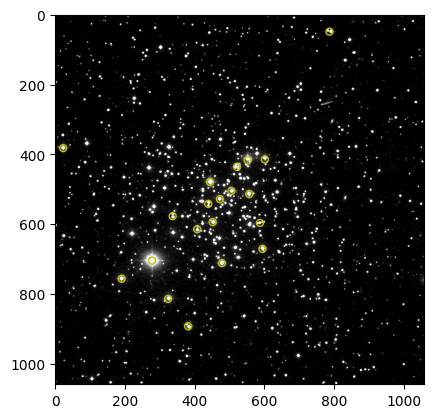

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from photutils.aperture import CircularAperture

plt.imshow(data, vmin=np.median(data), vmax=3 * np.median(data), cmap="Greys_r")
_ = CircularAperture(xy, r=10.0).plot(color="y")

In [10]:
from astropy.wcs.utils import proj_plane_pixel_scales

fov = (data.shape * proj_plane_pixel_scales(true_wcs))[0]
center = true_wcs.pixel_to_world(*np.array(data.shape) / 2)

In [54]:
center, fov, data.shape

(<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
     (132.83371279, 11.81205998)>,
 0.5001937284297959,
 (1059, 1059))

In [12]:
from twirl import gaia_radecs
from twirl.geometry import sparsify

all_radecs = gaia_radecs(center, 1.2 * fov)

# we only keep stars 0.01 degree apart from each other
all_radecs = sparsify(all_radecs, 0.01)

In [14]:
from twirl import compute_wcs

# we only keep the 12 brightest stars from gaia
wcs = compute_wcs(xy, all_radecs[0:30], tolerance=10)

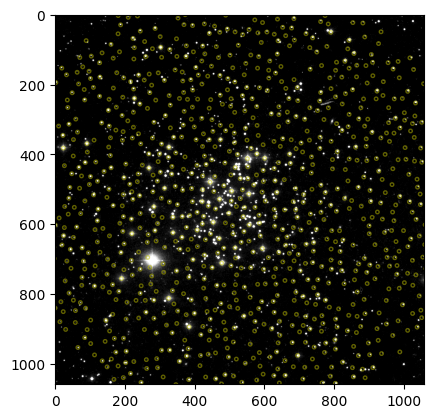

In [15]:
radecs_xy = np.array(wcs.world_to_pixel_values(all_radecs))
plt.imshow(data, vmin=np.median(data), vmax=3 * np.median(data), cmap="Greys_r")
_ = CircularAperture(radecs_xy, 5).plot(color="y", alpha=0.5)

Test on LAO observation

In [1]:
from photutils.datasets import load_star_image
from astropy.stats import sigma_clipped_stats
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
from astropy.io import fits

t_hdul = fits.open("/home/lrikozavr/LAO/2024_09_08/LEO_Meade902/N43032/R2233018P.fit")
t_data, t_true_wcs = t_hdul[0].data.transpose(), WCS(t_hdul[0].header)
t_mean, t_median, t_std = sigma_clipped_stats(t_data, sigma=3.0)

In [2]:
t_hdul[0].header

SIMPLE  =                    T                                                  
BITPIX  =                   16                                                  
NAXIS   =                    2                                                  
NAXIS1  =                  576                                                  
NAXIS2  =                  768                                                  
                                                                                
BSCALE  =                  1.0                                                  
BZERO   =                    0                                                  
DATAMIN =                    0                                                  
DATAMAX =                65535                                                  
TYPE    =                       1                                               
                                                                                
DATE-OBS= '2024-09-08'      

In [98]:
def calc(ra):
    num = ra.split(':')
    if(len(num[0]) == 4):
        return num[0][0]+str(int(num[0])+int(num[1])/60.+float(num[2])/3600.)
    return str(int(num[0])+int(num[1])/60.+float(num[2])/3600.)

In [3]:
from astropy.coordinates import SkyCoord


coord = SkyCoord(f'{t_hdul[0].header["RA"]} {t_hdul[0].header["DEC"]}', 
                 unit=("hourangle","deg"), 
                 frame="icrs", 
                 obstime=f'{t_hdul[0].header["DATE-OBS"]}T{t_hdul[0].header["TIME-OBS"]}'
)

coord

<SkyCoord (ICRS): (ra, dec) in deg
    (339.7128, 4.08861889)>

In [7]:
from twirl import find_peaks

t_xy = find_peaks(t_data)[0:25]

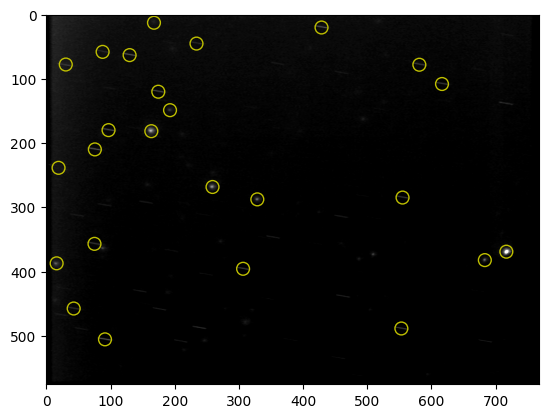

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from photutils.aperture import CircularAperture

plt.imshow(t_data, vmin=np.median(t_data), vmax=3 * np.median(t_data), cmap="Greys_r")
_ = CircularAperture(t_xy, r=10.0).plot(color="y")

In [10]:
from astropy.wcs.utils import proj_plane_pixel_scales

#t_fov = (t_data.shape * proj_plane_pixel_scales(t_true_wcs))[0]
t_center = coord
#t_center = t_true_wcs.pixel_to_world(*np.array(t_data.shape) / 2)

In [84]:
t_center#,t_fov

<SkyCoord (ICRS): (ra, dec) in deg
    (339.7128, 4.08861889)>

In [11]:
from twirl import gaia_radecs
from twirl.geometry import sparsify

t_gaia_radecs = gaia_radecs(t_center, fov = 3, limit=100000)
t_gaia_radecs

array([[340.72093925,   4.96883251],
       [340.11385844,   4.57447591],
       [339.70868619,   4.53017129],
       ...,
       [339.12057377,   3.03778343],
       [339.38121839,   5.52915979],
       [339.7149799 ,   5.25391258]])

In [119]:
# we only keep stars 0.01 degree apart from each other
t_all_radecs = sparsify(t_gaia_radecs, 0.1)
t_all_radecs[0:30], t_xy

(array([[340.11385844,   4.57447591],
        [339.70868619,   4.53017129],
        [339.63374836,   3.46370148],
        [340.96197552,   3.88827866],
        [340.58842061,   5.17371401],
        [338.63171231,   4.22238554],
        [339.9568895 ,   3.24243322],
        [338.749379  ,   4.16263474],
        [339.96229516,   4.11658473],
        [340.3427329 ,   3.60363029],
        [340.67007075,   4.49849618],
        [340.11803357,   3.13272827],
        [338.58051777,   3.74240692],
        [340.44922943,   4.98234275],
        [340.12825276,   4.69684346],
        [339.16099333,   4.50938758],
        [339.59465538,   3.57408845],
        [339.62390068,   3.34242261],
        [338.92593301,   4.2713612 ],
        [340.34128318,   3.74693092],
        [339.82706639,   3.54745729],
        [340.98473224,   4.30799314],
        [340.32144315,   4.25824061],
        [339.35083189,   4.56024325],
        [338.37610905,   4.36803092],
        [338.70745564,   3.84710405],
        [340

In [117]:
from twirl import compute_wcs

# we only keep the 12 brightest stars from gaia
t_wcs = compute_wcs(t_xy, t_all_radecs, tolerance=10)

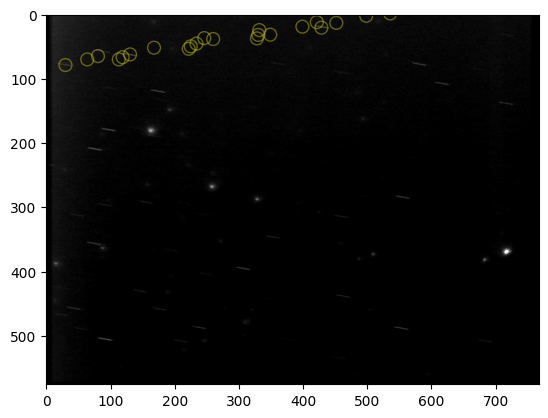

In [118]:
t_radecs_xy = np.array(t_wcs.world_to_pixel_values(t_all_radecs))
plt.imshow(t_data, vmin=np.median(t_data), vmax=3 * np.median(t_data), cmap="Greys_r")
_ = CircularAperture(t_radecs_xy, 10).plot(color="y", alpha=0.5)